# First touch with Knowledge Graphs

based (or better: copied) from https://networkx.org/documentation/stable/tutorial.html#attributes

## Creating a Graph

In [10]:
import networkx as nx
import matplotlib.pyplot as plt


In [ ]:
G = nx.Graph()
type(G)

## Nodes

Next task:  
- simply adding a node and
- adding nodes from an iterable

In [4]:
G.add_node(1)
G.add_nodes_from([2,3])
G

Adding nodes with attributes:

In [28]:
G.add_nodes_from([(4, {"color": "red"}), (5, {"color": "green"})])

Also adding nodes from another graph is possible

In [13]:
H = nx.path_graph(10)
G.add_nodes_from(H)

G now contains the nodes of H as nodes of G. In contrast, you could use the graph H as a node in G.

In [14]:
G.add_node(H)

The graph G now contains H as a node. This flexibility is very powerful as it allows graphs of graphs, graphs of files, graphs of functions and much more. It is worth thinking about how to structure your application so that the nodes are useful entities. Of course you can always use a unique identifier in G and have a separate dictionary keyed by identifier to the node information if you prefer.

## Edges

G can also be grown by adding one edge at a time,

In [27]:
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)  # unpack edge tuple*

adding a list of edges

In [25]:
G.add_edges_from([(1, 2), (1, 3)])

or by adding any ebunch of edges. An ebunch is any iterable container of edge-tuples. An edge-tuple can be a 2-tuple of nodes or a 3-tuple with 2 nodes followed by an edge attribute dictionary, e.g., (2, 3, {'weight': 3.1415}). Edge attributes are discussed further below.

In [32]:
H.add_edge(1,2)
H.edges


EdgeView([(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)])

In [33]:
G.add_edges_from(H.edges)

In [35]:
G.edges

EdgeView([(0, 1), (0, 4), (0, 5), (1, 2), (1, 6), (1, 3), (2, 3), (2, 7), (3, 4), (3, 8), (4, 9), (4, 5), (5, 7), (5, 8), (5, 6), (6, 8), (6, 9), (6, 7), (7, 9), (7, 8), (8, 9)])

We can also clear the nodes and edges

In [36]:
G.clear()

and then 

In [39]:
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam")        # adds node "spam"
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')

In [40]:
G.number_of_edges()

3

In [41]:
G.number_of_nodes()

8

The order of adjacency reporting (e.g., G.adj, G.successors, G.predecessors) is the order of edge addition. However, the order of G.edges is the order of the adjacencies which includes both the order of the nodes and each node’s adjacencies. See example below:

In [42]:
DG = nx.DiGraph()
DG.add_edge(2, 1)   # adds the nodes in order 2, 1
DG.add_edge(1, 3)
DG.add_edge(2, 4)
DG.add_edge(1, 2)
assert list(DG.successors(2)) == [1, 4]
assert list(DG.edges) == [(2, 1), (2, 4), (1, 3), (1, 2)]

## Examining elements of graphs
We can examine the nodes and edges. Four basic graph properties facilitate reporting: G.nodes, G.edges, G.adj and G.degree. These are set-like views of the nodes, edges, neighbors (adjacencies), and degrees of nodes in a graph. They offer a continually updated read-only view into the graph structure. They are also dict-like in that you can look up node and edge data attributes via the views and iterate with data attributes using methods .items(), .data(). If you want a specific container type instead of a view, you can specify one. Here we use lists, though sets, dicts, tuples and other containers may be better in other contexts.

In [43]:
list(G.nodes)

[1, 2, 3, 'spam', 's', 'p', 'a', 'm']

In [44]:
list(G.edges)

[(1, 2), (1, 3), (3, 'm')]

Get all neighbours of 1:

In [45]:
list(G.adj[1])  # or list(G.neighbors(1))

[2, 3]

In [48]:
list(G.neighbors(1))

[2, 3]

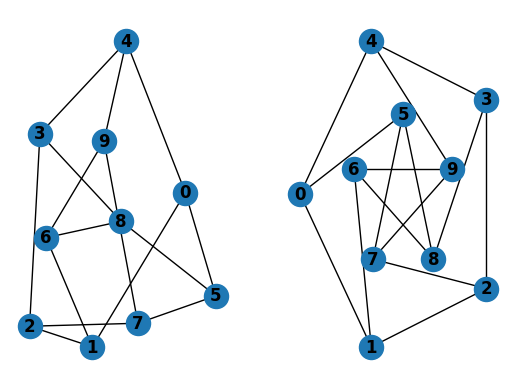

In [11]:
G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')